[6.04351329572925, 25.987107171635774, 35.85817888799355, 108.17888799355357, 112.81224818694601, 119.05721192586623, 214.94762288477034, 342.06285253827554, 412.3690572119259, 484.89121676067685, 606.3658340048347, 695.6083803384366, 732.0709105560031, 759.6696212731667, 817.8887993553584, 860.7977437550362, 877.5181305398871, 878.525382755842, 881.3456889605156, 891.0153102336824, 896.8573730862207, 901.2892828364222, 912.7719580983078, 921.2328767123287, 939.9677679290894]


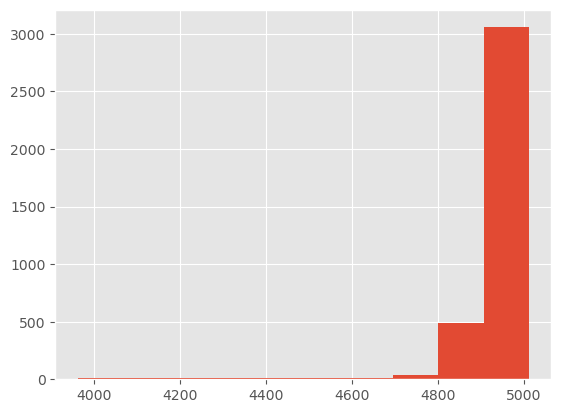

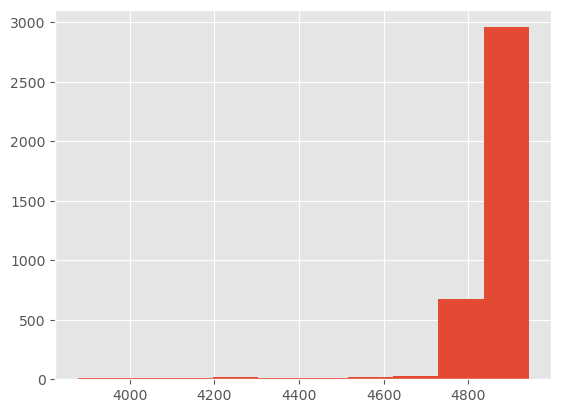

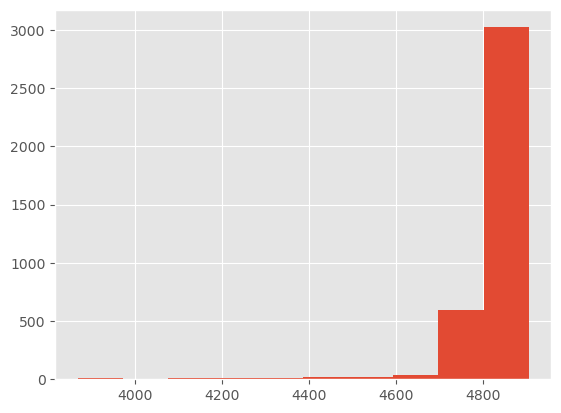

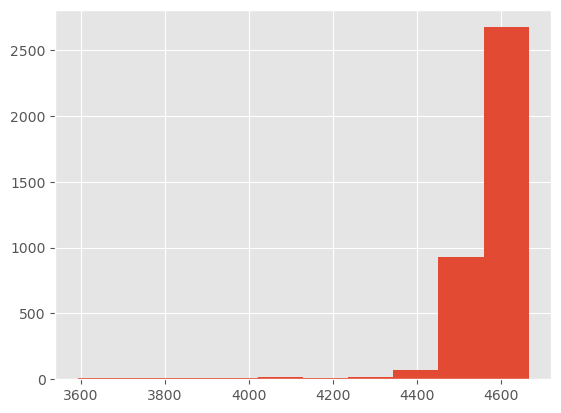

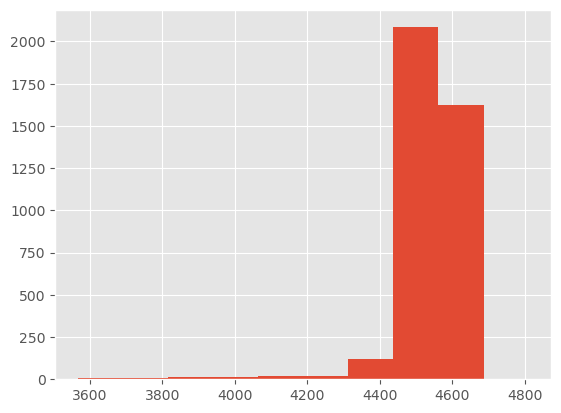

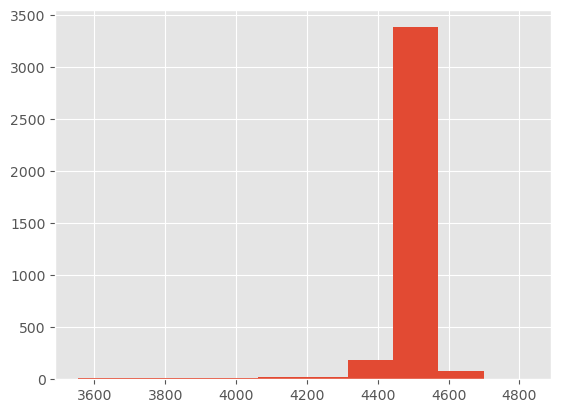

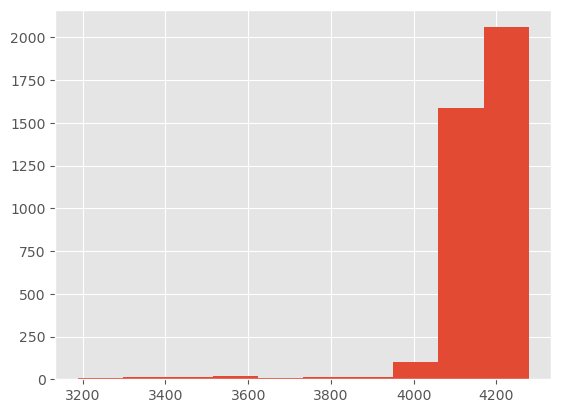

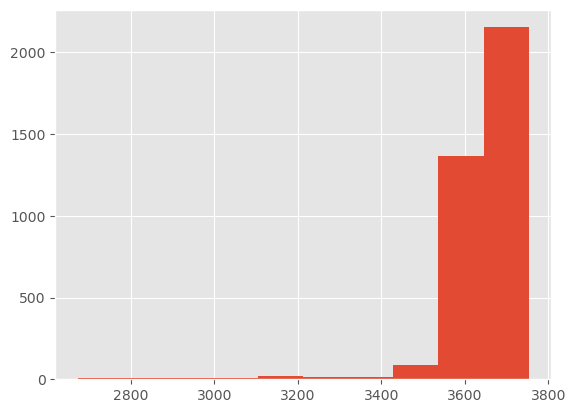

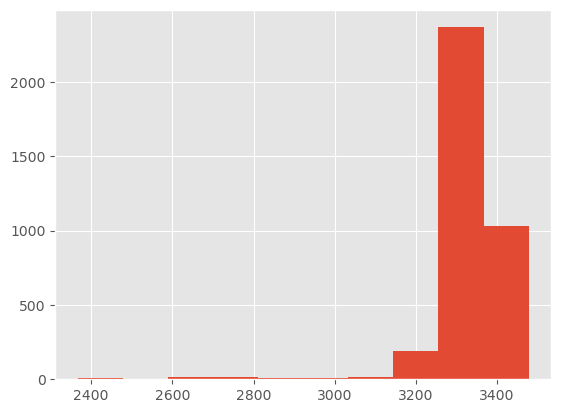

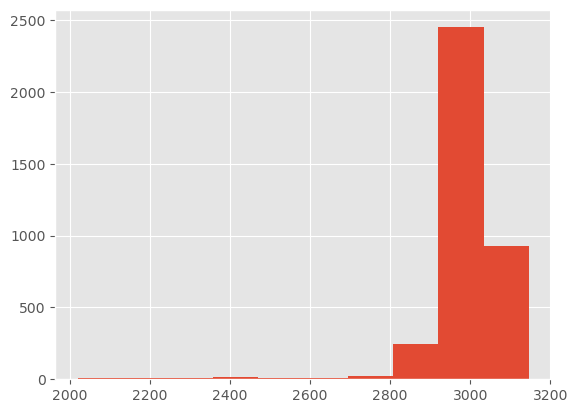

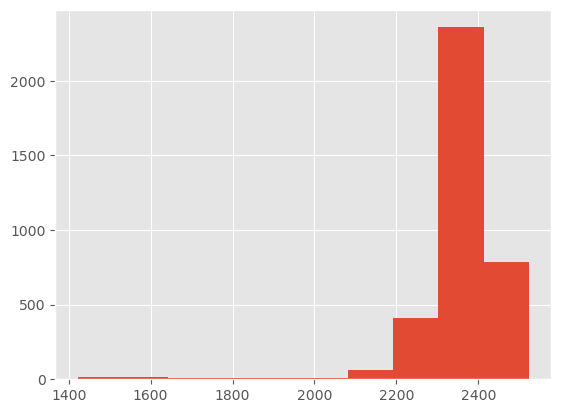

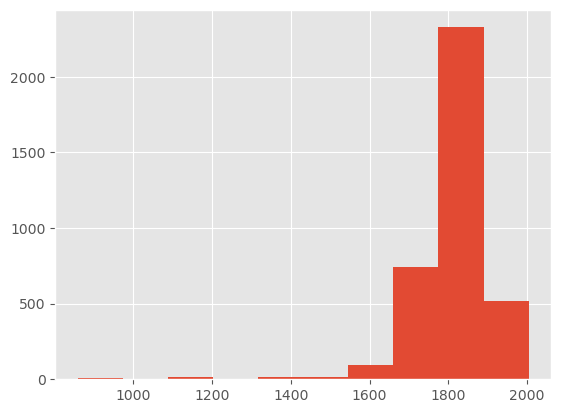

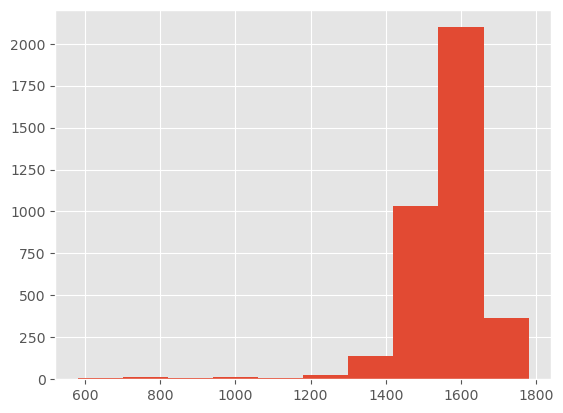

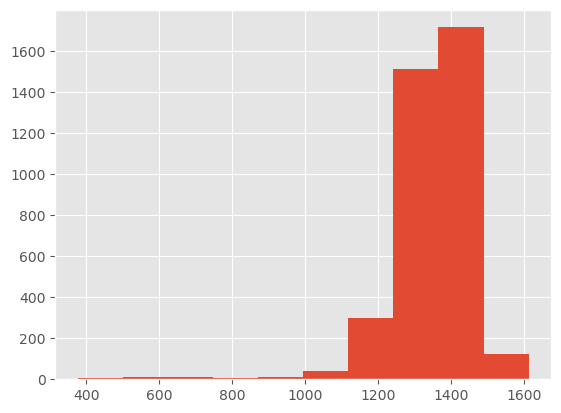

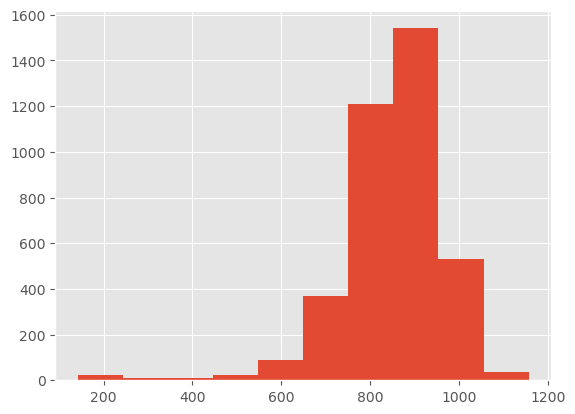

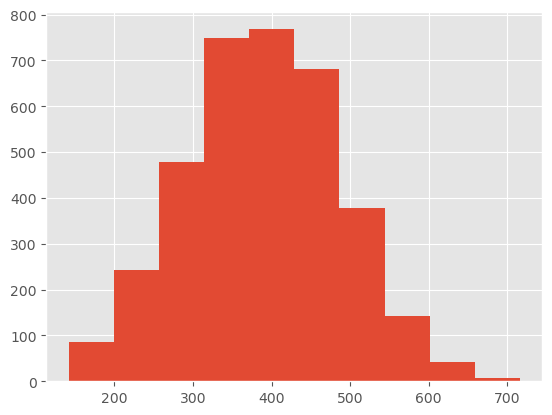

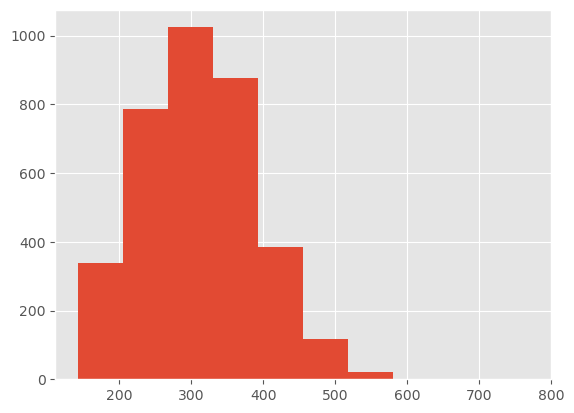

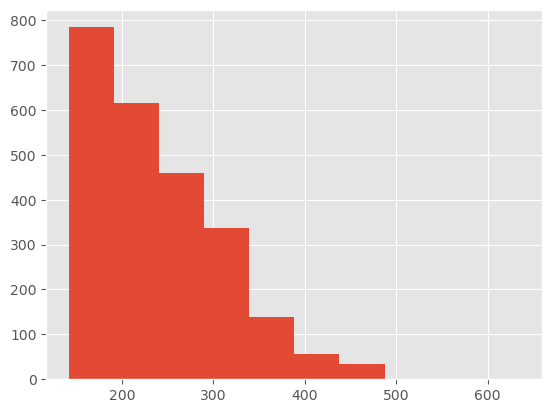

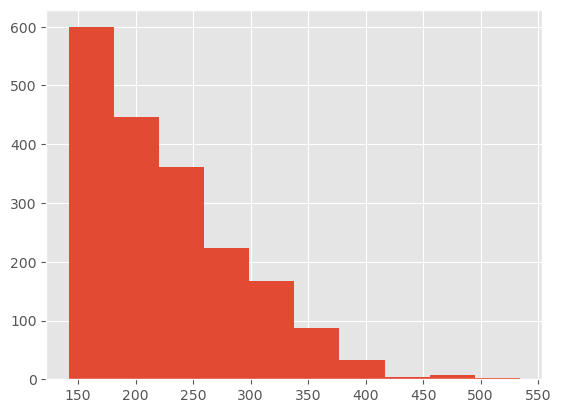

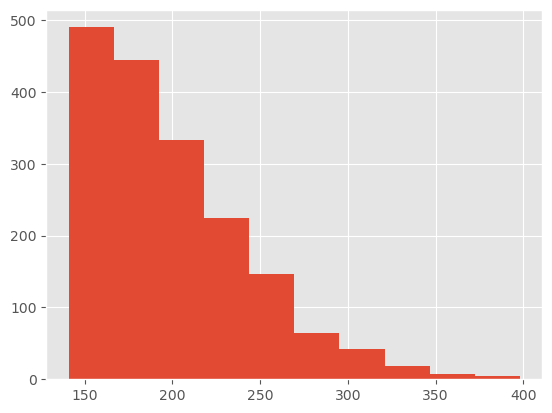

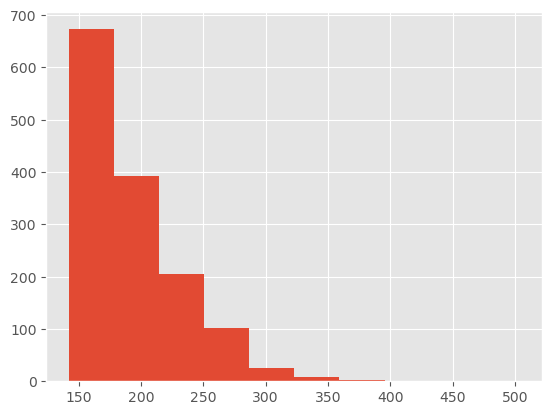

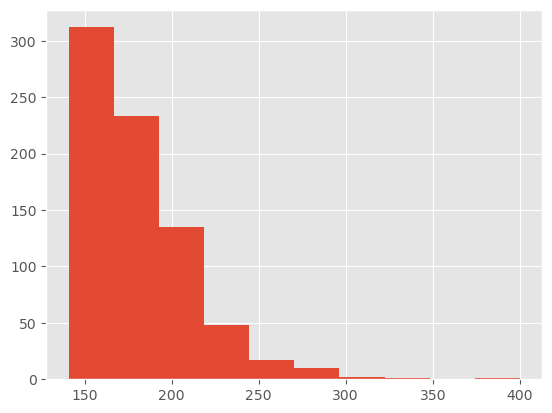

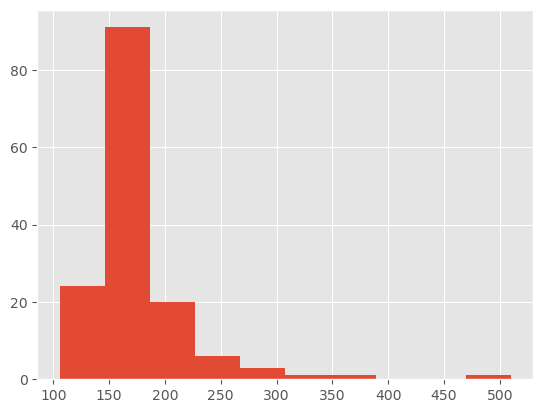

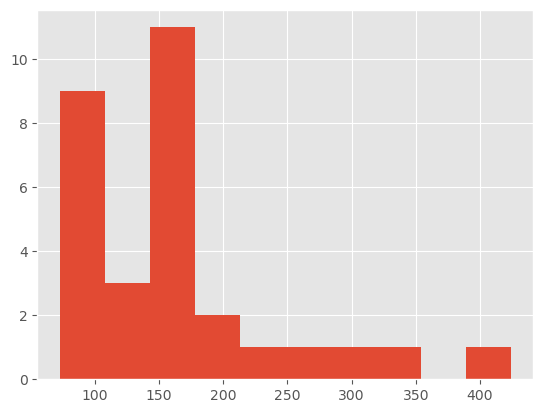

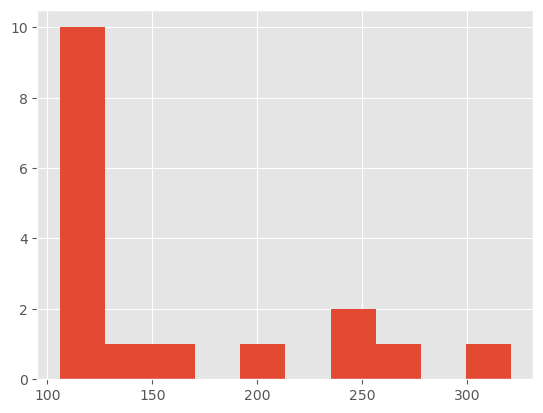

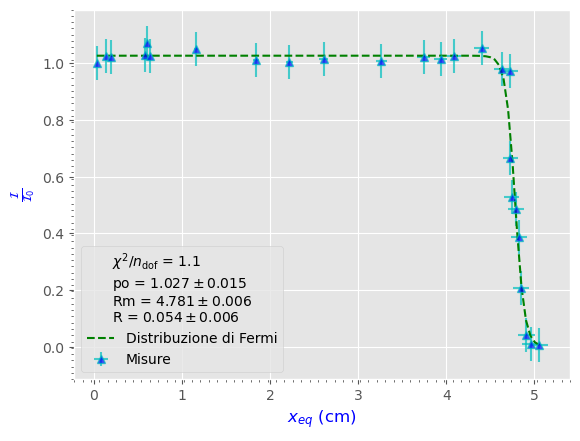

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL, LeastSquares
from scipy.stats import norm
import matplotlib.ticker as ticker


Vtotlto=4.375
h = 5.38 #cm
Vo = 4.964
po = 1000 #mbar
V = [0.03, 0.129, 0.178, 0.537, 0.560, 0.591,  1.067, 1.698, 2.047, 2.407, 3.01, 3.453, 3.634, 3.771, 4.06, 4.273, 4.356, 4.361, 4.375, 4.423, 4.452, 4.474, 4.531, 4.573, 4.666] #volt

p = list(map(lambda x: po*x/Vo, V)) 
xeq = list(map(lambda x: x*h/po, p))

print(p)
errxeq=[]
for i in range(len(V)):
    errxeq.append(xeq[i]*np.sqrt((.1/h)**2+(1/1000)**2))

In=[]
err=.6e-1
ch = []

for i in range(len(V)):
    
    raw_data = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\range\range_"+str(V[i])+".dat")
    
    data1 = []
    signal=[]
    
    for i in range(len(raw_data)):
        for j in range(int(raw_data[i])):
            data1.append(i)
    
    data = np.array(data1)

    for i in range(len(data)):
        if data[i] > max(0, np.argmax(raw_data))-1000 and data[i] < np.argmax(raw_data)+1000 : signal.append(data[i])

    """plt.hist(signal)
    plt.show()"""
    #print(np.argmax(raw_data))
    
    bin_content, bin_edges= np.histogram(signal, bins=10)
    In.append(sum(bin_content))
    ch.append(np.argmax(raw_data))
    #plt.axvline(x=np.argmax(raw_data), color="red")
    #plt.show()

Io=In[0]

y = list(map(lambda x: x/Io, In))
func = lambda x, po, Rm, R: po/(1+np.e**((x-Rm)/R))
least_squares = LeastSquares (xeq, y, err, func)
my_minuit = Minuit (least_squares, po = 1, Rm=4, R=0.08) 
my_minuit.migrad ()  
my_minuit.hesse ()
#display(my_minuit)

x2 = np.linspace(xeq[0], xeq[-1], 100)

fig, ax = plt.subplots()

plt.errorbar(xeq, y, xerr= errxeq, yerr= err, linestyle="None", marker="^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
plt.plot(x2, func(x2, my_minuit.values[0], my_minuit.values[1], my_minuit.values[2] ), linestyle="--", color="g", label="Distribuzione di Fermi")
plt.grid("on")
plt.xlabel(r"$x_{eq}$ (cm)", color="b")
plt.ylabel(r"$\boldsymbol{\frac{\mathcal{I}}{\mathcal{I}_{0}}}$", color="b", rotation=90)
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {my_minuit.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(my_minuit.parameters, my_minuit.values, my_minuit.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info), frameon=True, loc = "lower left")

plt.style.use("ggplot")

#plt.xlim(10, 80)
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))


plt.show()


[5.4439, 5.362500000000001, 5.3295, 5.0479, 5.022600000000001, 4.9995, 4.5925, 4.0315, 3.7015000000000002, 3.3121, 2.6191, 2.0229, 1.7369, 1.5081, 0.9724, 0.45320000000000005, 0.3861, 0.1595, 0.1892, 0.1859, 0.16390000000000002, 0.16060000000000002, 0.16390000000000002, 0.11770000000000001, 0.11770000000000001]
[0.8698144750948008, 0.23034664530221619, 0.16059710589419404, 0.10895937894894125, 0.17677920543453732, 0.15567024570797375, 0.078879909469281, 0.08518447226289592, 0.17384375775672872, 0.2040432027973854, 0.0808595247861751, 0.09772792784786474, 0.10817695074293375, 0.06320431657266329, 0.22133001206749212, 0.1286319520240984, 0.046039858547063446, 0.21161343399621102]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5644\174351044.py:39: RuntimeWarning: divide by zero encountered in scalar divide
  if (a<20) and (a>-1) and (abs(a)/l*np.sqrt((errDelta_E[i]/Delta_E[i])**2+(errDelta_x[i]/Delta_x[i])**2)<0.9):
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5644\174351044.py:39: RuntimeWarning: invalid value encountered in scalar multiply
  if (a<20) and (a>-1) and (abs(a)/l*np.sqrt((errDelta_E[i]/Delta_E[i])**2+(errDelta_x[i]/Delta_x[i])**2)<0.9):


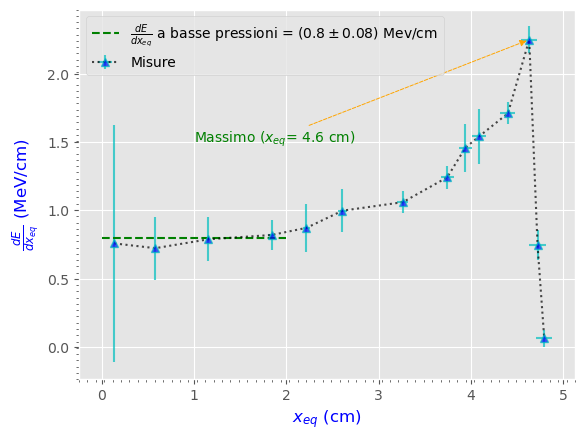

In [94]:
#curva calibrazione dati En = a * ch + b per 50mm2
"""a = 0.0011254056672008671 
erra = 4.844870327965148e-07 
b = -0.07391854484382687 
errb = 0.002425539695977177
offset = 0.020531753544178244"""

a = 1.10e-3
erra = 0.19e-3

E = list(map(lambda x: x*a, ch))
errE = list(map(lambda x: x*erra, ch))
print(E)
Delta_E = []
Delta_x = []
errDelta_E=[]
errDelta_x=[]

for i in range(0, len(E)-1):
    #if (xeq[i+1]-xeq[i] > .05):
        Delta_E.append(-E[i+1]+E[i])
        errDelta_E.append(errE[i+1]+errE[i])
        Delta_x.append(xeq[i+1]-xeq[i])
        errDelta_x.append(errxeq[i+1]+errxeq[i])
#print(Delta_x)
#print(errDelta_x, errDelta_E, E)
#print(Delta_E)

y=[]
x=[]
erry=[]
errx=[]
#print(len(Delta_E), len(xeq))
#print(Delta_E, Delta_x)
l=20
for i in range(len(Delta_E)):
    
        a = Delta_E[i]/Delta_x[i]
        if (a<20) and (a>-1) and (abs(a)/l*np.sqrt((errDelta_E[i]/Delta_E[i])**2+(errDelta_x[i]/Delta_x[i])**2)<0.9):
            y.append(abs(a))
            x.append(xeq[i+1])
            errx.append(errxeq[i+1])
            erry.append(abs(a)/l*np.sqrt((errDelta_E[i]/Delta_E[i])**2+(errDelta_x[i]/Delta_x[i])**2))
            #erry.append(0.1)

print(erry)
fig, ax = plt.subplots()
l=21
l=14
plt.errorbar(x[:l], y[:l], xerr=list(map(lambda x: x, errx[:l])), yerr=erry[:l], linestyle=":", marker = "^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
plt.grid("on")
plt.xlabel(r"$x_{eq}$ (cm)", color="b")
plt.ylabel(r"$ \frac{dE}{dx_{eq}} $ (MeV/cm)", color="b")

pesi = list(map(lambda x: 1/x**2, erry))
plateau = 0
for i in range(len(y[0:4])):
    plateau = plateau + y[i]*pesi[i]

plateau = plateau/sum(pesi[:4])
err_plateau = 1/np.sqrt(sum(pesi[:4]))

plt.hlines(plateau, 0, 2, linestyle="--", color="g", label=r"$ \frac{dE}{ dx_{eq} } $ a basse pressioni = $("f"{round(plateau,2)} \\pm {round(err_plateau,2)})$ Mev/cm")


plt.legend( frameon=True, loc="upper left")

plt.style.use("ggplot")

ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))

ax.annotate(f'Massimo (' r"$ x_{eq}$" f'= {x[11]:.1f} cm)', xy=(x[11], y[11]),
             xycoords='data',
             xytext=(1, 1.5),
             textcoords='data',
             arrowprops=dict(arrowstyle= '-|>',
                             color='orange',
                             lw=.7,
                             ls='--'),
            color="g"
           )

plt.show()



In [98]:
i1 = 4.781
e1 = 0.006
i2 = 4.783
e2 = 0.03
t = abs(i1-i2)/np.sqrt(e1**2+e2**2)

print(x[11], errx[11]*1.2)
print(t)

4.631091861402095 0.1034451128785094
0.06537204504608317


In [100]:
i1 = 4.781
e1 = 0.006
i2 = 4.6
e2 = 0.1

t = abs(i1-i2)/np.sqrt(e1**2+e2**2)
print(t)

1.8067507702930599
